## Python & Pytorch Installation Check(Use Pyrhon=3.11.13)

In [2]:
import torch
x = torch.rand(5, 3)
x

tensor([[0.1723, 0.1186, 0.3161],
        [0.1934, 0.2931, 0.3798],
        [0.3501, 0.4106, 0.0414],
        [0.7677, 0.3700, 0.3893],
        [0.3793, 0.9261, 0.3315]])

In [3]:
torch.cuda.is_available()

True

## Understanding the Data Structure

In [2]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
df = pd.read_csv('foodhub_order.csv')
# Return the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [12]:
# Check the shape of the dataset
rows, columns = df.shape
print('Rows = {}, Columns = {}'.format(rows, columns))

Rows = 1898, Columns = 9


In [13]:
# Datatypes of the different columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [15]:
# Checking for missing values in the data
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [16]:
# Get the summary statistics of the numerical data
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [28]:
# How many orders are not rated?
print(df['rating'].value_counts())
print('There are {} unrated orders'.format(df['rating'].value_counts()['Not given']))

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64
There are 736 unrated orders


## Univariate Analysis

14
1200
178
14


<Axes: xlabel='cuisine_type', ylabel='count'>

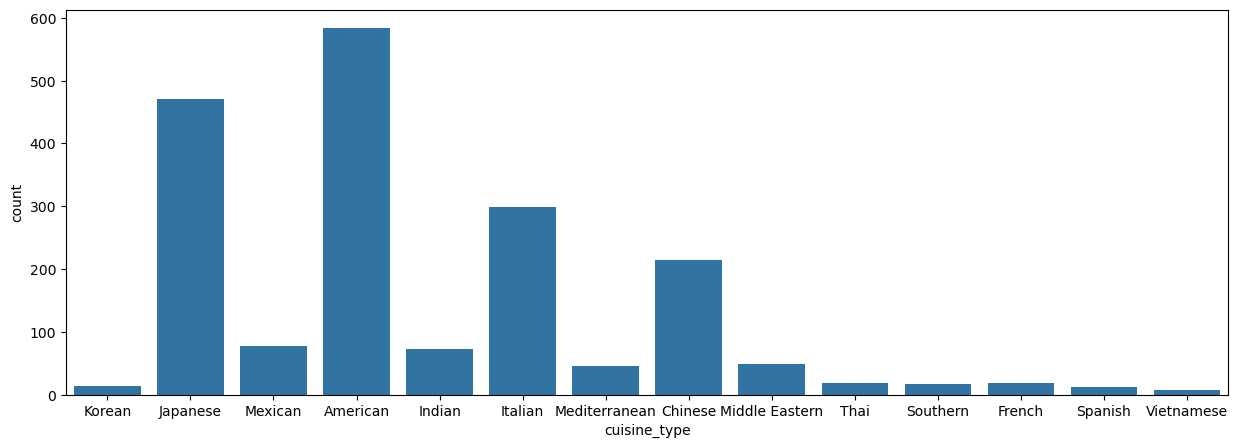

In [3]:
# Check unique order ID
print(df['cuisine_type'].nunique())
# Check unique customer ID
print(df['customer_id'].nunique())
# Check unique Resturant Name
print(df['restaurant_name'].nunique())
# Check unique cuisine type
print(df['cuisine_type'].nunique())
# Create a countplot for cuisine type 
plt.figure(figsize = (15, 5))
sns.countplot(data = df, x = 'cuisine_type')

### Cost of the order

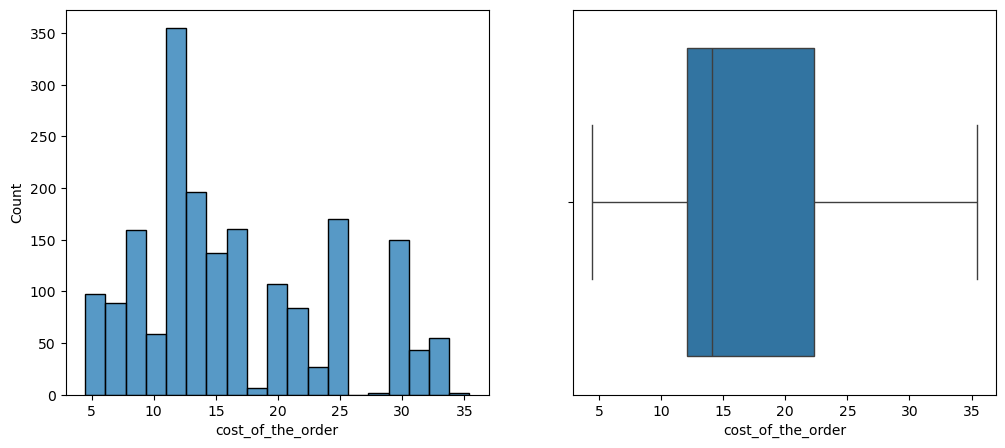

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# Histogram for the cost of order
sns.histplot(data = df, x = 'cost_of_the_order', ax=axes[0])
# Boxplot for the cost of order
sns.boxplot(data = df, x = 'cost_of_the_order', ax=axes[1])
plt.show()

### Day of the week

<Axes: xlabel='day_of_the_week', ylabel='count'>

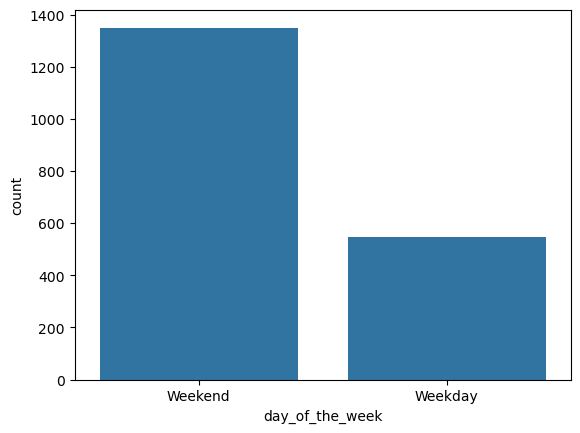

In [11]:
# Check the unique values
df['day_of_the_week'].nunique()
sns.countplot(data = df, x = 'day_of_the_week')

### Rating

<Axes: xlabel='rating', ylabel='count'>

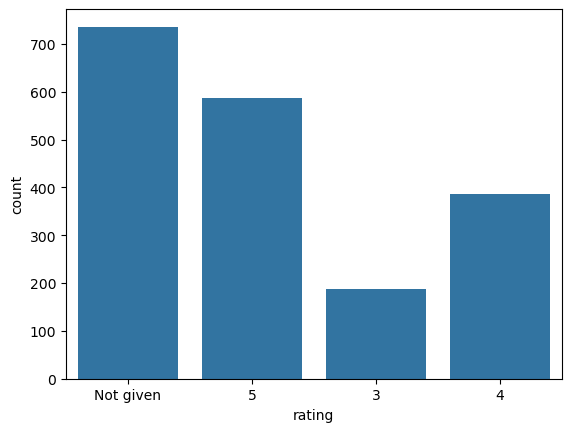

In [12]:
# Check the unique values
df['rating'].nunique()
sns.countplot(data = df, x = 'rating')

### Food Preparation Time

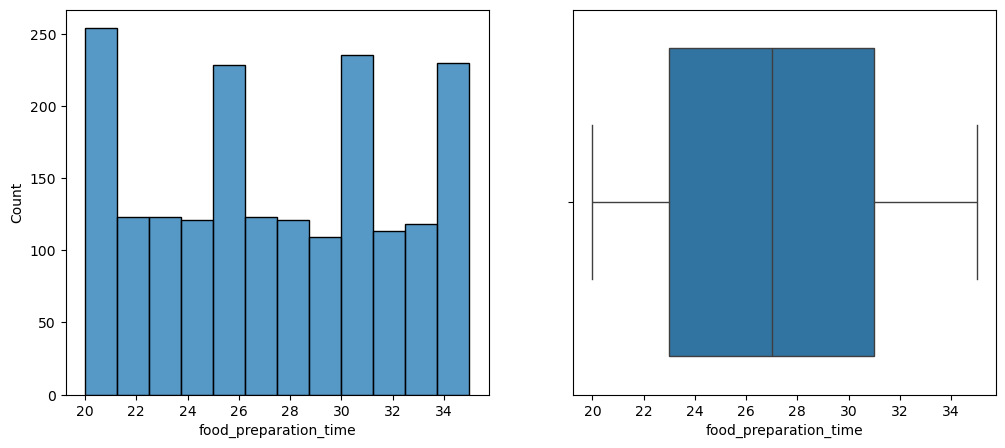

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# Histogram for the food preparation time
sns.histplot(data = df, x = 'food_preparation_time', ax = axes[0])
# Boxplot for the food preparation time
sns.boxplot(data = df, x = 'food_preparation_time', ax = axes[1])
plt.show()

### Delivery Time

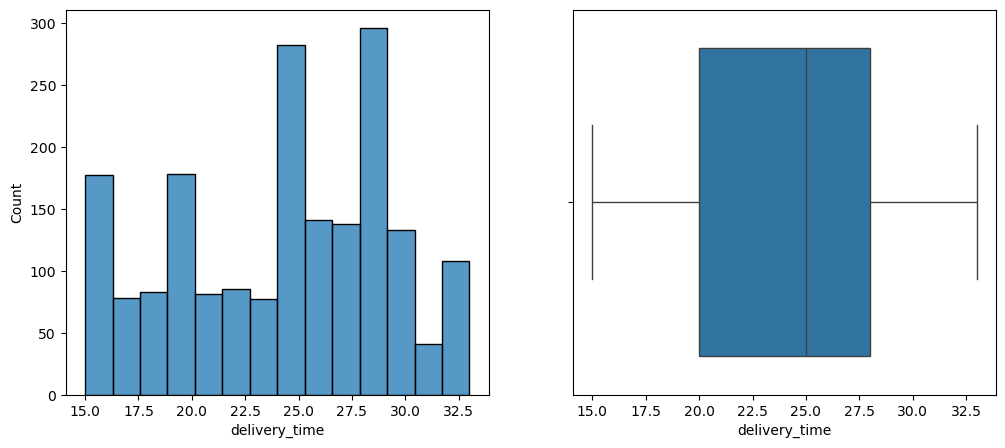

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# Histogram for the delivery time
sns.histplot(data = df, x = 'delivery_time', ax = axes[0])
# Boxplot for the delivery time
sns.boxplot(data = df, x = 'delivery_time', ax = axes[1])
plt.show()

### Get top 5 restaurants with highest number of orders

In [27]:
df['restaurant_name'].value_counts().head(5)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

### Get most popular cuisine on weekends

In [29]:
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts()

cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: count, dtype: int64

### What percentage of the orders cost more than 20 dollars?

In [ ]:
# Get orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order'] > 20]
print('The number of total orders that cost above 20 dollars is : ', df_greater_than_20.shape[0])
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100
print('Percentage of orders above 20 dollars : ', round(percentage, 2), '%')

### What is the mean order delivery time?

In [33]:
# Get the mean delivery time
mean_del_time = df['delivery_time'].mean()
print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


### Find the IDs of these customers and the number of they placed

In [36]:
# Get the counts of each customer_id
df['customer_id'].value_counts().head(3)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

## Multivariate Analysis

### Cuisine vs Cost of the order

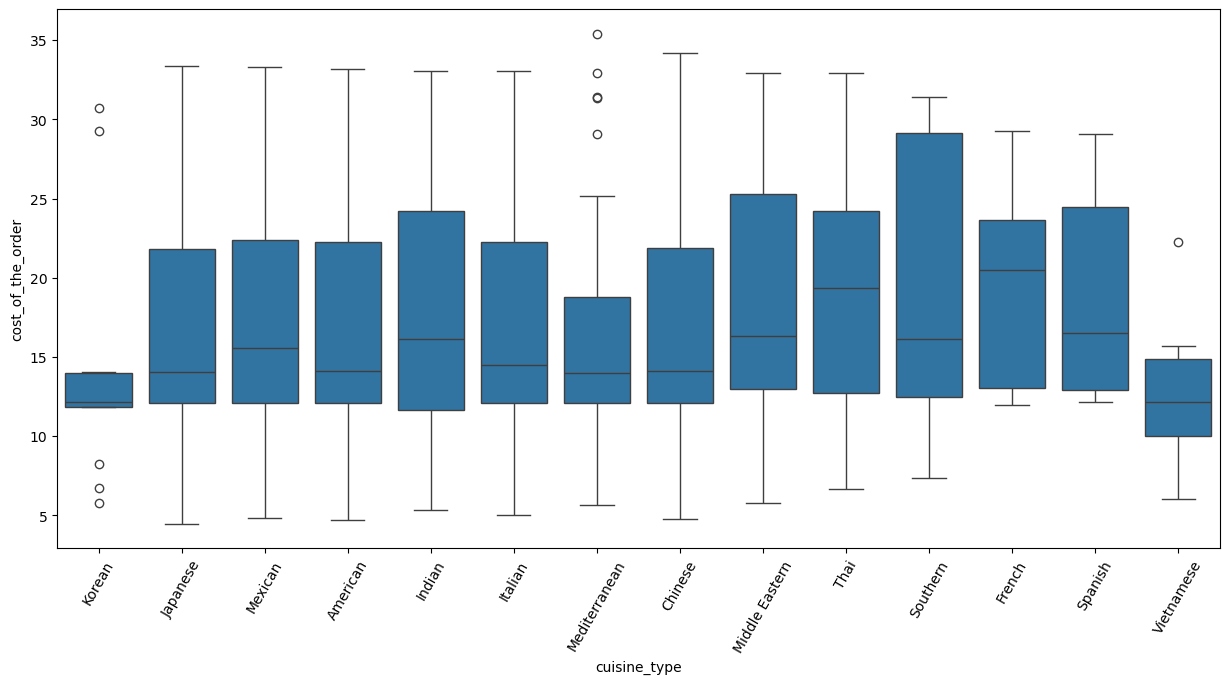

In [37]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize = (15, 7))
sns.boxplot(data = df, x = 'cuisine_type', y = 'cost_of_the_order')
plt.xticks(rotation = 60)
plt.show()

### Cuisine vs Food Preparation time

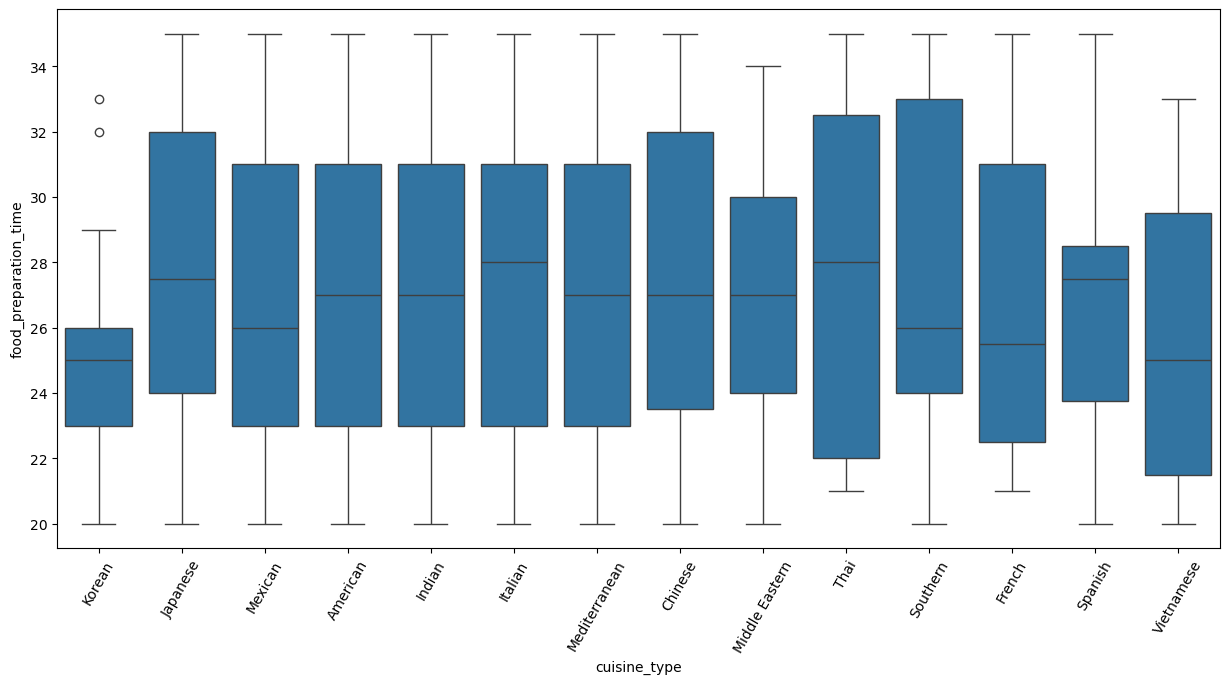

In [39]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize = (15, 7))
sns.boxplot(data = df, x = 'cuisine_type', y = 'food_preparation_time')
plt.xticks(rotation = 60)
plt.show()

### Day of the Week vs Delivery time

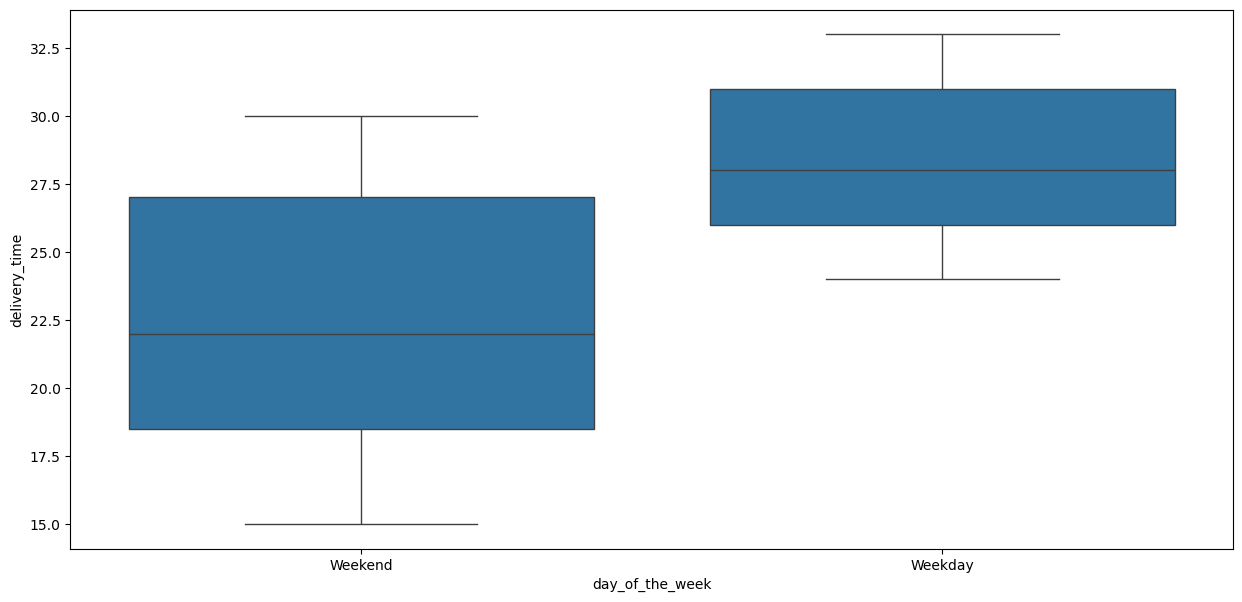

In [40]:
# Relationship between day of the week and delivery time
plt.figure(figsize = (15, 7))
sns.boxplot(data = df, x = 'day_of_the_week', y = 'delivery_time')
plt.show()

### The revenue generated by the restaurants

In [41]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

### Rating vs Delivery time

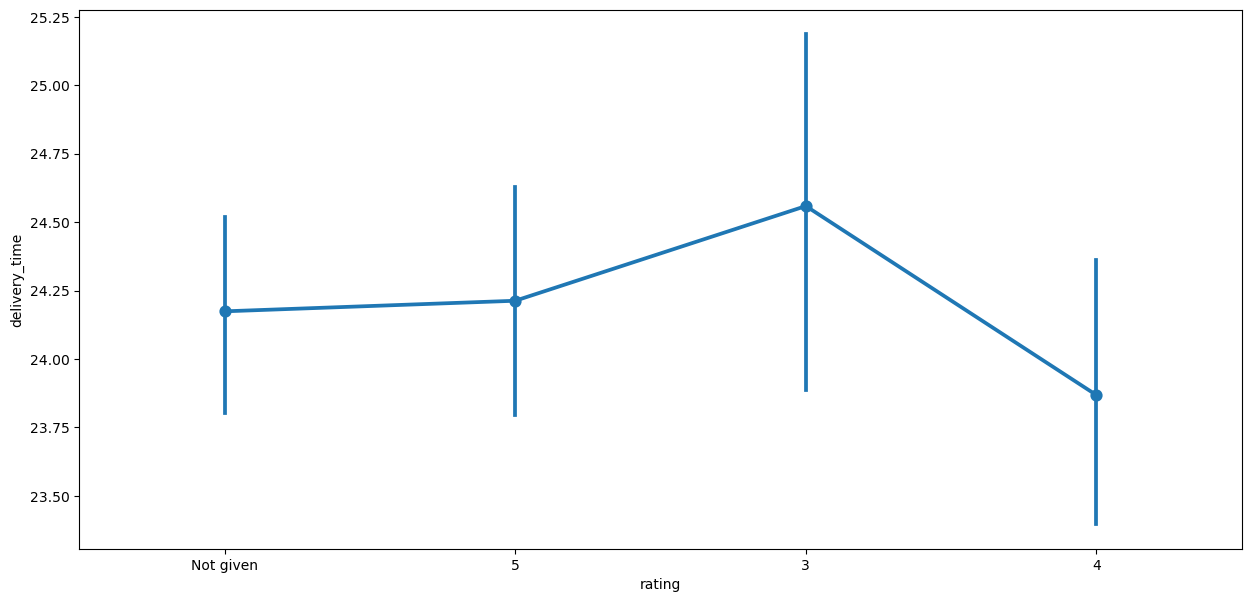

In [42]:
# Relationship between rating and delivery time
plt.figure(figsize = (15, 7))
sns.pointplot(data = df, x = 'rating', y = 'delivery_time')
plt.show()

### Rating vs Food preparation time

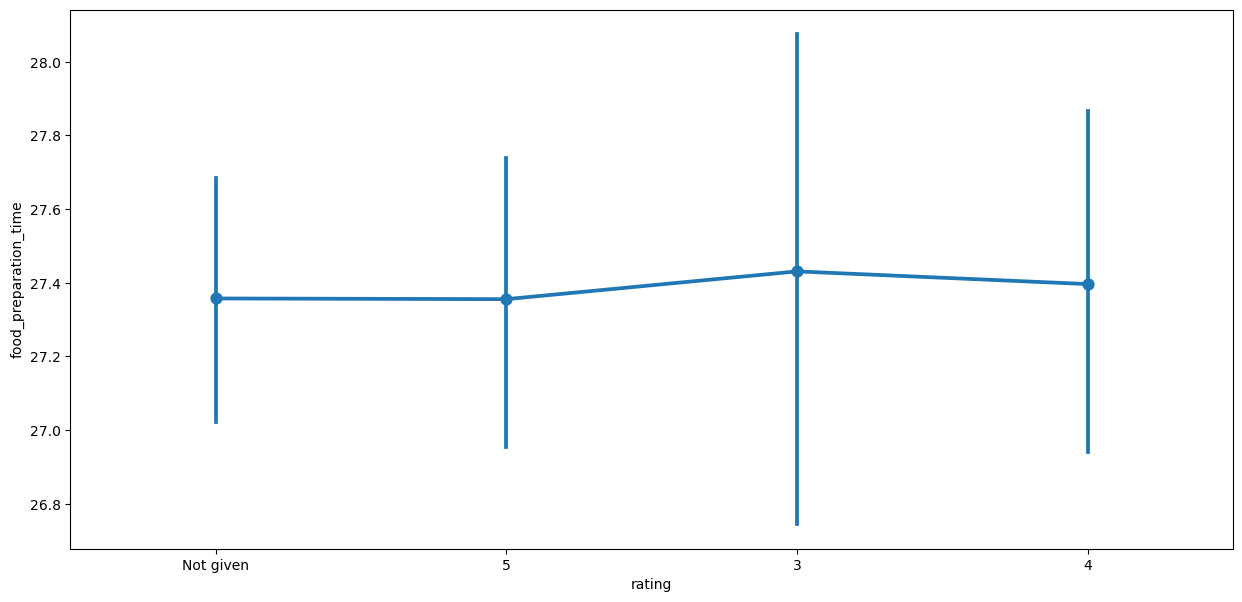

In [43]:
# Relationship between rating and food preparation time
plt.figure(figsize = (15, 7))
sns.pointplot(data = df, x = 'rating', y = 'food_preparation_time')
plt.show()

### Rating vs Cost of the order

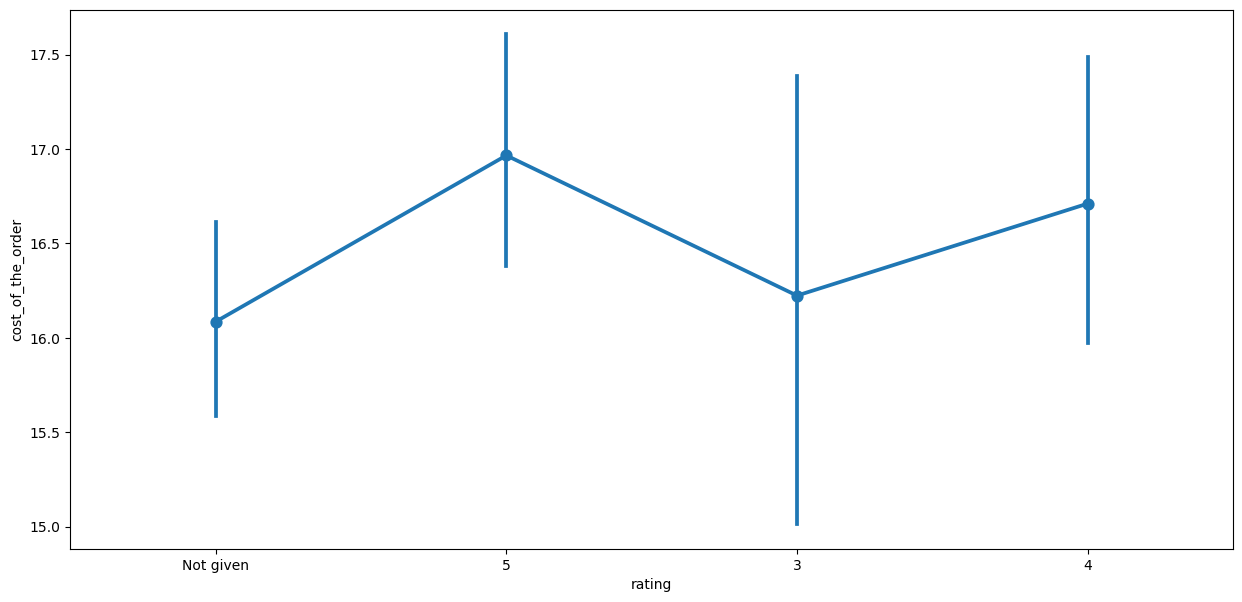

In [44]:
# Relationship between rating and cost of the order
plt.figure(figsize = (15, 7))
sns.pointplot(data = df, x = 'rating', y = 'cost_of_the_order')
plt.show()

### Correlation among variables

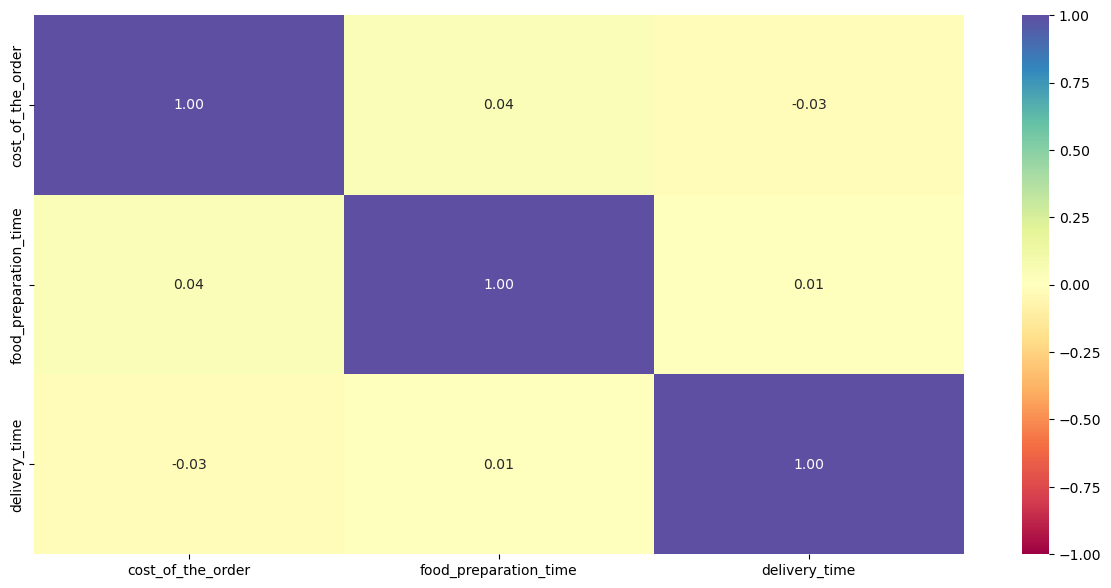

In [46]:
# Plot the heatmap
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize = (15, 7))
sns.heatmap(df[col_list].corr(), annot = True, vmin = -1, vmax = 1, fmt = '.2f', cmap = 'Spectral')
plt.show()

### The conditions: the restaurants must have a rating count of more than 50 and the average rating should be greater than 4

In [49]:
# filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()
# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')
# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [54]:
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name']
# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()
# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna()

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


### The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars

In [65]:
# Function to determine the revenue
def compute_rev(x):
    if x > 20: return x * 0.25
    elif x > 5: return x * 0.15
    else: return x * 0
        
df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [66]:
# Get the total revenue and print it
total_rev = df['Revenue'].sum()
print('the net revenue is around', round(total_rev, 2), 'dollars')

the net revenue is around 6166.3 dollars


### What percentage of orders take more than 60 minutes to get delivered from the time the order is placed?

In [67]:
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
df_longer_than_60 = df[df['total_time'] > 60]
count_of_orders = df_longer_than_60.shape[0]
print('The number of total orders that took longer than 60 minutes is:', count_of_orders)
total_orders = df.shape[0]
percentage = (count_of_orders / total_orders) * 100
print('Percentage of orders above 20 dollars', round(percentage, 2), '%')

The number of total orders that took longer than 60 minutes is: 200
Percentage of orders above 20 dollars 10.54 %


In [68]:
# Get the mean delivery time on weekdays and print it
mean_delivery_time_weekdays = round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean())
print('The mean delivery time on weekdays is around', mean_delivery_time_weekdays, "minutes")
# Write the code below to get the mean delivery time on weekends and print it
mean_delivery_time_weekends = round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean())
print('The mean delivery time on weekends is around', mean_delivery_time_weekends, "minutes")

The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes


## What are your conclusions from the analysis?
- 顧客行為模式:
  
週末的訂單量 (約1300筆) 遠高於平日 (約500筆)，顯示週末是餐飲外送的高峰期。
顧客最常點的菜系是美國菜、日本菜、義大利菜和中國菜，而越南菜、西班牙菜等則相對冷門。
有相當高比例的訂單 (736筆，約佔38.8%) 沒有被評分，這可能是個問題。

- 營運狀況:
  
平均備餐時間約為27分鐘，平均配送時間約為24分鐘。
平日的平均配送時間 (約28分鐘) 明顯比週末 (約22分鐘) 長。這可能與交通狀況或外送員數量有關。
總耗時超過60分鐘的訂單約佔10.54%，這可能導致顧客體驗不佳。

- 餐廳表現:
  
Shake Shack 在訂單數 (219) 和營收 ($3579.53) 上都遙遙領先，是平台的明星餐廳。
營收排名前五的餐廳都突破了 ($1000) 的營收門檻。

- 顧客滿意度 (評分):
  
配送時間是影響評分的重要因素。從 Rating vs Delivery time 的點圖可以看出，評分為 3 的訂單，其平均配送時間最長，暗示著配送延遲會直接導致低分。
備餐時間和訂單成本與評分的關聯性則較不明顯。


## What recommendations would you like to share to help improve the business?
- 針對週末高峰期進行行銷:

原因 : 週末訂單量大。

建議 : FoodHub可以與熱門餐廳合作，推出週末限定套餐或家庭分享餐，進一步提高客單價和平台營收。

- 優化平日外送效率，提升顧客滿意度:

原因 : 平日外送時間比週末長，且配送慢會導致低評分。

建議 : FoodHub應分析平日外送慢的具體原因。可以考慮在平日午/晚餐尖峰時段提供外送員加成獎金，吸引更多外送員上線，縮短配送時間。對於預計會延遲的訂單，應主動通知顧客並提供小額優惠券作為補償，以維持顧客滿意度。

- 提升冷門菜系餐廳的曝光度:

原因 : 越南菜、西班牙菜等訂單量較少。

建議 : FoodHub可以舉辦異國美食週相關活動，將這些冷門菜系的餐廳放在App首頁推薦，並提供首次訂購折扣，鼓勵用戶嘗試新口味，同時也幫助這些餐廳增加訂單。

- 鼓勵用戶評分機制:

原因 : 近四成訂單未被評分，導致平台無法收集足夠的回饋。

建議 : 建立一個回饋獎勵機制。例如，顧客完成評分後，可以獲得積分或下次訂餐的折扣券，以提高評分率。